# **Multiple Linear Regression**

Multiple Linear Regression Formula:

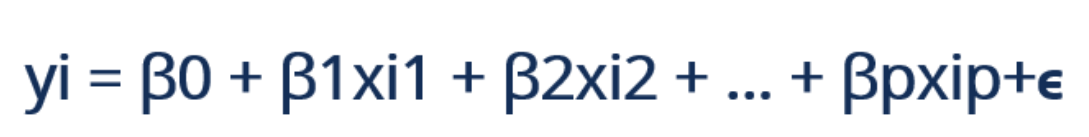

## **Normal Equation Method**
The normal equation provides a closed-form solution for linear regression.

In [ ]:
import numpy as np

#Example features(X) and target(y)
X = [[1,4],[2,5],[3,8],[4,2]]
X = np.array(X)
y = [1,6,8,12]
#c = [c0,c1,c2]


Normal Equation:

image.png

###c = (*Xt* * X)^*-1* * (*Xt* * y)

> A = Xt * X

> B = Xt * y




In [ ]:
# Add a column of ones to X for the bias term(c)
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

In [ ]:
X_transpose = X.transpose()
print(X_transpose)
A = np.dot(X_transpose,X)
A

[[1. 1. 1. 1.]
 [1. 2. 3. 4.]
 [4. 5. 8. 2.]]


array([[  4.,  10.,  19.],
       [ 10.,  30.,  46.],
       [ 19.,  46., 109.]])

In [ ]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 3.15300546, -0.59016393, -0.30054645],
       [-0.59016393,  0.20491803,  0.01639344],
       [-0.30054645,  0.01639344,  0.05464481]])

In [ ]:
B = np.dot(X_transpose, y)
B

array([ 27.,  85., 122.])

In [ ]:
C = np.dot(A_inv,B)
C

array([-1.69945355,  3.48360656, -0.05464481])

In [ ]:
print('y = ', C[0],'+', C[1],'x1 +', C[2],'x2')

y =  -1.6994535519125618 + 3.4836065573770463 x1 + -0.05464480874316982 x2


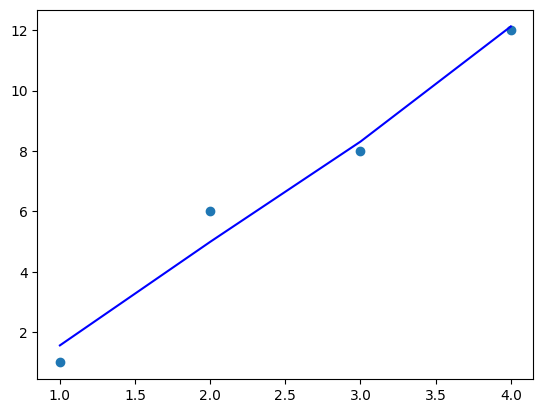

In [ ]:
# Plot the data and the predicted line.
import matplotlib.pyplot as plt

plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], np.dot(X, C), color="blue")
plt.show()

##**Gradient Descent**
We can perform linear regression using Gradient Descent by dividing training algorithm in 3 functions: *computing_cost, computing_gradient* and *gradient_descent*

In [ ]:
def compute_cost(X, y, weights):
  predictions = np.dot(X, weights)

  error = y - predictions
  squared_errors = error**2

  #Calculating the mean squared error
  mean_squared_error = np.mean(squared_errors)

  return mean_squared_error

In [ ]:
def compute_gradient(X, y, weights):
  m = X.shape[0]
  error = y - np.dot(X, weights)
  gradient = -2/m * np.dot(X.T, error)
  return gradient

In [ ]:


def GradientDescent(X, y, learning_rate, num_iterations):

  # Initializing the coefficients/weights to zero
  weights = np.zeros(X.shape[1])

  for i in range(num_iterations):
    cost = compute_cost(X,y,weights)
    gradient = compute_gradient(X, y, weights)
    weights = weights - learning_rate * gradient
  return(weights)



In [ ]:
num_iterations = 1000
learning_rate = 0.01
weight = GradientDescent(X, y, learning_rate, num_iterations)


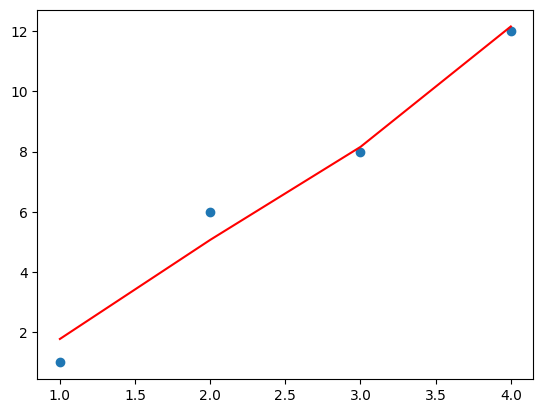

In [ ]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], np.dot(X, weight), color="red")
plt.show()

In [ ]:
print('y = ', weight[0],'+', weight[1],'x1 +', weight[2],'x2')

y =  -1.2049069669859884 + 3.388884827315188 x1 + -0.10100498065246044 x2
